# Board Game Geek Data Analysis: Example 1

## Introduction
For this data science project, I have created multiple python scripts that have scraped https://boardgamegeek.com

As part of the web scraping/data mining, I have created a Postgres database where all of my board game data has been stored. A total of 10,000 board games were scraped from the website, using the Python packages "requests" and "BeautifulSoup", as well as the [XML formatted API](https://boardgamegeek.com/wiki/page/BGG_XML_API&redirectedfrom=XML_API#) that is provided by boardgamegeek.com.

All of the data analysis is built around SQL queries to my boardgame database, for which I use the Python package "psycopg2" to communicate.

The full list of data scraped for each boardgame is:
* __id__:            Unique ID assigned to the boardgame by boardgamegeek.com
* __rank__:          Current rank of the boardgame at the time of scraping
* __name__:          Name of boardgame
* __href__:          Part of URL that identifies this boardgame. Append it to https://boardgamegeek.com to go to game's page
* __pub_year__:      Year the boardgame was published
* __geek_rating__:   Current geek rating the boardgame has at the time of scraping. This is what the game is ranked by. Rating is weighted by the number of voters
* __avg_rating__:    Current average rating the boardgame has at the time of scraping. This is based off the people who have rated it
* __num_voters__:    Number of people who have rated the boardgame at the time of scraping
* __min_players__:   Minimum number of players for the boardgame
* __max_players__:   Maximum number of players for the boardgame
* __play_time__:     Estimated time it takes to play the boardgame
* __sugg_age__:      Suggested minimum age to play the boardgame
* __complx_rating__: A rating based off votes by players for how difficult a boardgame is to learn and play 
* __designers__:     List of designers who made the boardgame
* __artists__:       List of artists for the boardgame
* __categories__:    List of categories the boardgame was placed in
* __mechanics__:     List of gaming mechanics used in the boardgame
* __family__:        List of families the boardgame is grouped into
* __type__:          List of types the boardgame is classified under

## Project Proposal

Boardgames are a very popular activity for people and boardgamegeek.com has a very active community. I believe it's possible to leverage the immense ammount of data on their website in order to investigate what makes a boardgame highly rated. There are many possibilites that could influence what makes a game well rated and it's likely that the data is very intertwined, where no one factor can really determine a game's success. This provides a difficult problem that machine learning/deep learning may be able to solve. At the very least there's plenty of data, including personal user data on the website that hasn't been tapped, which could help build a recommendation system that could recommend similar boardgames to a user, based on their interests.

Project Ideas:
* Use machine learning to learn what makes a highly rated game. Allow users to select game features and have the machine learning algorithm estimate a games rating.
* Build a recommendation system. Recommend similar games to a user, based on their interests. Can leverage just boardgame data, boardgamegeek user data (requires more scraping), or both.
* Build a chatbot that can talk with a user and help guide them through finding a game that they'd like to play/purchase. Use natural language processing and deep learning, combined with the data scraped from boardgamegeek.com. 

## Exploratory Data Analysis: Influence of Game Mechanics on a Game's Rating

One of the first analyses I have performed on this data set is the influence that game mechanics have on a boardgame's rating and playtime. This seems like an imporant aspect to what makes or break a game for a person, since the mechanics are what defines how the game is going to be played and may influence how long it takes people to play. I myself do not enjoy "Card Drafting" elements in a game, but I love games that involve "Worker Placement".

For this exploratory data analysis I wanted to see what the average geek rating and average playtime was for boardgames, for each game mechanic listed on boardgamegeek.com. There are a total of 51 unique game mechanics. However not only did I want to know these average values, I wanted to keep track of how many games were actuallyassociated with mechanic.

To get the data for the following plots, I used the function __avg_geek_rating_playtime_per_mechanic__ inside my [__data_analysis.py__](https://github.com/rolison/BoardGameGeek-DataScience/blob/master/data_analysis.py) script. This function uses SQL laguage to communicate with my database to get the average Geek Rating, average Playtime, and number of boardgames, while grouping these values based on game mechanic. Here is the specific syntax:
```
SELECT mechanics.mechanic, 
       AVG(boardgames.geek_rating),
       AVG(boardgames.play_time),
       COUNT(boardgames.id)
FROM mechanics
INNER JOIN boardgames
ON boardgames.id=mechanics.bg_id
WHERE boardgames.rank < %s
GROUP BY mechanics.mechanic;
```
The ```%s``` option is a variable passed by the user indicating to perform this query only on games with a rank higher than the requested value. Passing 10001 would query over all games in the database. The option is also available for the user to specify whether they want their query sorted by AVG(Geek Rating), AVG(Playtime), or COUNT(boardgame) in descending order (```ORDER BY item DESC```).

In order to make the following plot, the function __scatter_plot_mechanics_with_rank__ was called from the [__data_analysis.py__](https://github.com/rolison/BoardGameGeek-DataScience/blob/master/data_analysis.py) script. All of the code found here is in my Python scripts found in the [GitHub repo](https://github.com/rolison/BoardGameGeek-DataScience)

This first plot looks at all boardgames.

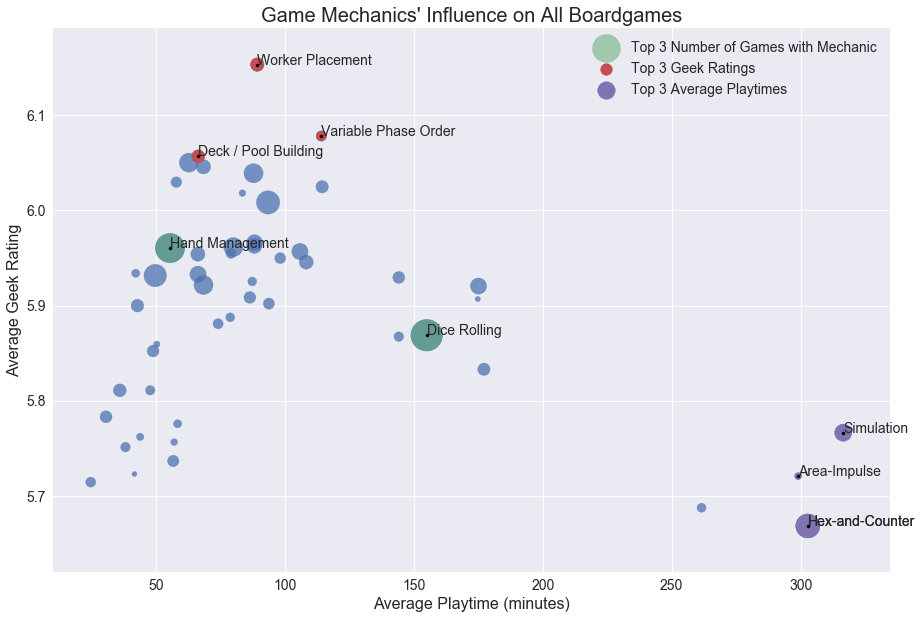

In [2]:
import data_analysis

data_analysis.scatter_plot_mechanics_with_rank(rank=10001, top=3)

The majority of game mechanics keep playtimes around 100 minutes or less, while geek ratings vary substantially (geek ratings only range between 5.5 and ~8.7 for all games on the website). The more interesting information is observed when the number of games for each mechanic is considered. The number of games assoicated with a game mechanic influenced the the size of the circles used in the scatter plot. Three metrics were used to highlight mechanics of interest: top 3 mechanics with most games associated with it; top 3 mechaincs with highest average Geek Rating; and top 3 mechanics with highest average playtime. In this case, _Hex-and-Counter_ belonged to both the highest playtime and highest number of games group. 

An interesting find is that the top 3 mechanics that have the most games associated with it have average or below-average geek ratings while the top 3 mechanics with the higehst average geek rating are in a smaller number of games, relatively speaking. Also, all mechanics with long playtimes also have some of the lowest Geek Ratings.

Lets perform the exact same analysis, except limit our sample of games to the top 200 ranked games on boardgamegeek.com (as opposed to 10,000). 

This is easily done with my function that was used previously.

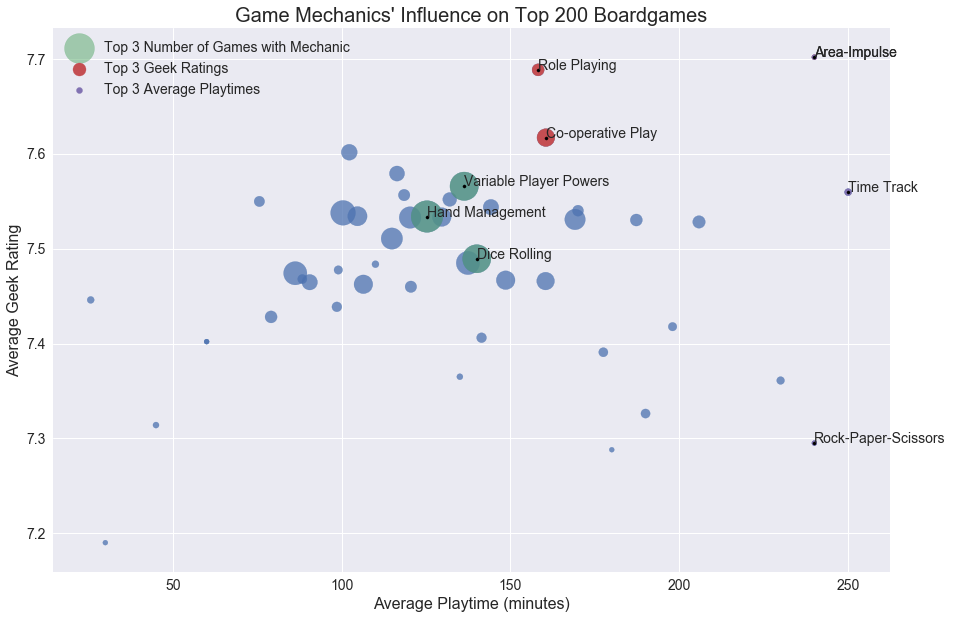

In [3]:
data_analysis.scatter_plot_mechanics_with_rank(rank=201, top=3)

The overall ratings have increased for all mechanics simply because we've limited ourselves to the top 200 hundred games, which will naturally have higher ratings and skew the numbers towards higher values. Average playtime over all these mechanics has risen by about 30 minutes. So maybe the 200 best boardgames have playtimes around 2 hours? However similar information arises where _Dice Rolling_ and _Hand Management_ still belong to the most amount of games but still are not among the highest rated. The top 3 highest rated mechanics are all new, and this time _Area-Impulse_ belongs to both highest average Geek Rating and highest average Playtime. This is quite interesting since _Area-Impulse_ used to be one of the longest playtimes and lowest rated, when all games were considered, but has now become a mechanic with games having some of the highest Geek ratings, when only the top 200 games are considered. 

### Conclusion

It would appear that it's difficult to prove that a single mechanic can influence whether a game will be highly rated, as shown by the _Area-Impulse_ mechanic, but it may be an ok metric when estimating playtimes. Although, the 6 highest rated mechanics found in the two plots may be a good starting point if one were to make their own game. Even though Dice Rolling and Hand Management were not the highest rated, they were always used in the most games. It's possible that these two mechanics may not be a huge factor by themselves but are an integral part to a good game. This makes sense when considering how generic and wide spread the use of dice and cards are in boardgames. Many games have a handful of mechanics to them, so it's likely that a combination and not just one single mechanic are what makes for a great game.